## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition.

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013.

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

Note that we will be using only the images inside the image sections subfolders, containing only the traffic signs.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

### Import Required packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
import os, glob
from PIL import Image
import cv2

# Sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score, classification_report

# Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras import regularizers

### Loading the data and Feature Extraction

In [ ]:
# Path to the folder containing the image sections
folder_path = "/content/FullIJCNN2013"

# Initialize lists to store features, labels, and image data
features_list = []
labels = []
image_data = []

# Iterate over images in the folder
for label in os.listdir(folder_path):
    label_path = os.path.join(folder_path, label)
    if os.path.isdir(label_path):
        for img_name in os.listdir(label_path):
            img_path = os.path.join(label_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                # Resize the image to (30, 30)
                resized_img = cv2.resize(img, (30, 30))
                # Convert image to numpy 1-D array
                img_array = resized_img.flatten()

                # Append image data, features, and labels
                image_data.append(resized_img)
                features_list.append(img_array)
                labels.append(int(label))  # Assuming label names are numeric

# Convert lists to numpy arrays
features_array = np.array(features_list)
labels_array = np.array(labels)
image_data_array = np.array(image_data)

### Data Exploration and Preprocessing

#### Plotting the sample image of each class

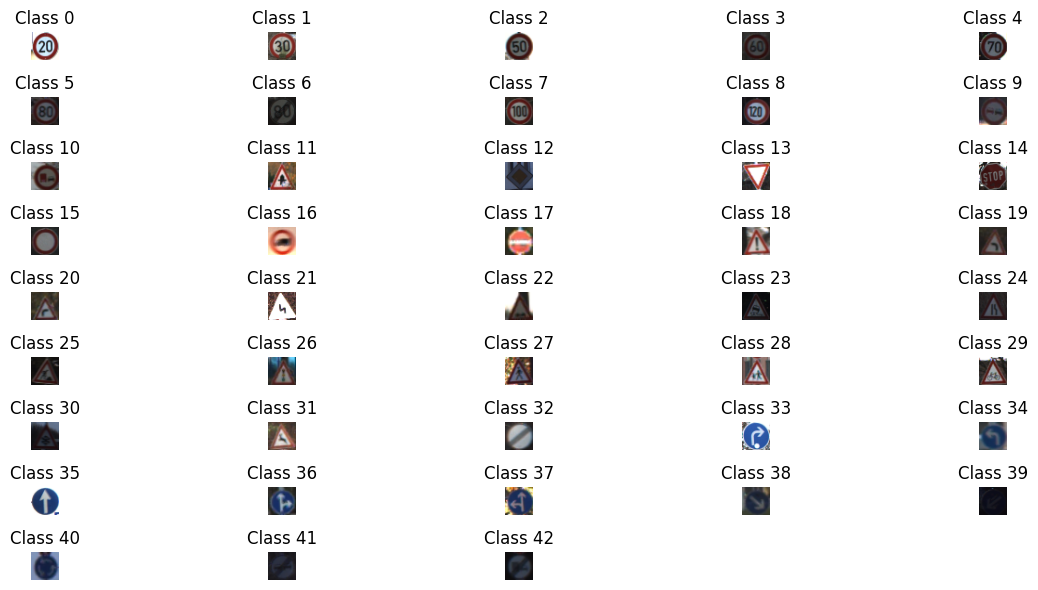

In [ ]:
# Dictionary to store sample images for each class
sample_images = {}

# Find unique classes (labels)
unique_labels = np.unique(labels_array)

# Iterate over unique labels to find sample images
for label in unique_labels:
    # Find the index of the first image for the current class
    index = np.where(labels_array == label)[0][0]
    # Get the image data for the current class
    sample_images[label] = image_data_array[index]

# Plot the sample images of each class
num_classes = len(sample_images)
num_rows = (num_classes // 5) + 1
num_cols = min(num_classes, 5)

plt.figure(figsize=(12, 6))
for i, (label, sample_img) in enumerate(sample_images.items(), 1):
    plt.subplot(num_rows, num_cols, i)
    plt.imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Class {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Plotting the distribution of Classes

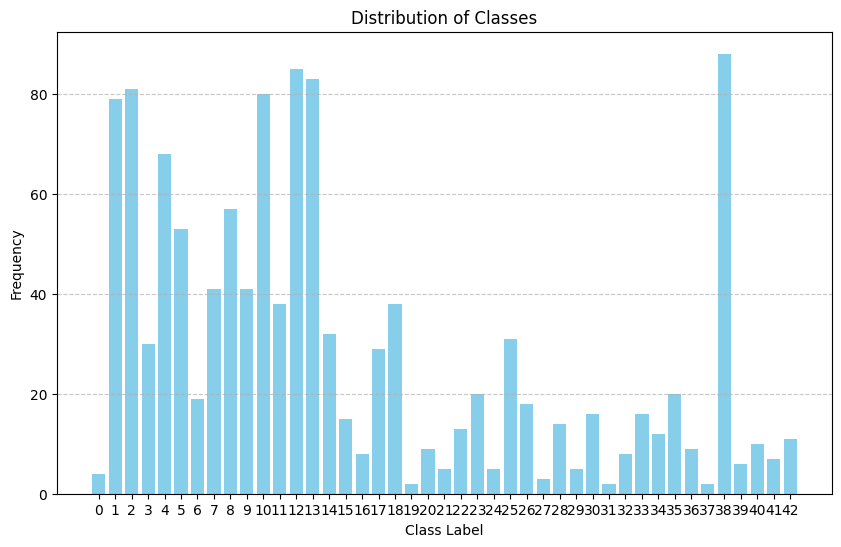

In [ ]:
unique_classes, class_counts = np.unique(labels_array, return_counts=True)

# Plot the distribution of classes
plt.figure(figsize=(10, 6))
plt.bar(unique_classes, class_counts, color='skyblue')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Distribution of Classes')
plt.xticks(unique_classes)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Normalizing the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

In [ ]:
# Normalize the features_array
normalized_features = normalize(features_array)

# Print the normalized features
print("Normalized features:")
print(normalized_features)

Normalized features:
[[0.03561588 0.02887774 0.02560493 ... 0.03388322 0.02753011 0.02367975]
 [0.05512172 0.04361036 0.03652644 ... 0.00819078 0.00708392 0.00730529]
 [0.00231213 0.00301582 0.00231213 ... 0.00191002 0.00341793 0.00331741]
 ...
 [0.00718426 0.00802947 0.00824077 ... 0.01331202 0.01394592 0.01796066]
 [0.01204514 0.01432395 0.01497504 ... 0.01367286 0.01204514 0.01790494]
 [0.00665403 0.00752195 0.00665403 ... 0.00462889 0.00405028 0.00462889]]


### Training the MLP classifier on features

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(normalized_features, labels_array, test_size=0.2, random_state=42)

# Instantiate the MLP classifier with different parameters (you can adjust these parameters)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=1)

# Train the MLP classifier
mlp_classifier.fit(X_train, y_train)

# Predict the labels for test set
y_pred = mlp_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Get the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8765432098765432


In [ ]:
# Get performance metrics (classification report)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.89      0.89        19
           2       0.79      0.85      0.81        13
           3       0.50      1.00      0.67         2
           4       0.92      1.00      0.96        12
           5       0.57      0.44      0.50         9
           6       0.50      1.00      0.67         2
           7       0.75      1.00      0.86         3
           8       0.93      0.72      0.81        18
           9       0.88      1.00      0.93         7
          10       1.00      1.00      1.00        18
          11       1.00      0.83      0.91         6
          12       0.93      0.93      0.93        14
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00         7
          15       0.80      0.80      0.80         5
          16       0.67      0.67      0.67         3
          17       1.00      1.00      1.00         8
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

### Tuning the hyper-parameters

In [ ]:
# Define the parameter grid to search through
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'max_iter': [100, 200, 300],
    'alpha': [0.0001, 0.001, 0.01],
}

# Instantiate the MLP classifier
mlp_classifier = MLPClassifier(random_state=1)

# Set up GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(mlp_classifier, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score found by GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochast

#### Trying different algorithms and comparimg the results with the MLP classifier

In [ ]:
# Define a dictionary of classifiers
classifiers = {
    "MLP Classifier": MLPClassifier(random_state=1),
    "Random Forest": RandomForestClassifier(random_state=1),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f"{name} Accuracy: {score}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Classifier Accuracy: 0.7901234567901234
Random Forest Accuracy: 0.8189300411522634
SVM Accuracy: 0.6831275720164609
KNN Accuracy: 0.5967078189300411


### Implementing a simple Neural Networks using keras

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
# Step 1 - Build the architecture

# Define the Keras model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer with the right number of input features
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

In [ ]:
# Step 2 - Compile the model

# Compile the Keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Step 3 - Fit and Evaluate the model

# Fit the model to the training data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/10
31/31 [==============================] - 3s 11ms/step - loss: -39.1475 - accuracy: 0.0608 - val_loss: -109.9111 - val_accuracy: 0.0782
Epoch 2/10
31/31 [==============================] - 0s 5ms/step - loss: -222.8233 - accuracy: 0.0619 - val_loss: -432.9195 - val_accuracy: 0.0782
Epoch 3/10
31/31 [==============================] - 0s 5ms/step - loss: -691.9517 - accuracy: 0.0619 - val_loss: -1152.8596 - val_accuracy: 0.0782
Epoch 4/10
31/31 [==============================] - 0s 4ms/step - loss: -1622.2555 - accuracy: 0.0619 - val_loss: -2480.5762 - val_accuracy: 0.0782
Epoch 5/10
31/31 [==============================] - 0s 6ms/step - loss: -3252.0896 - accuracy: 0.0619 - val_loss: -4670.0190 - val_accuracy: 0.0782
Epoch 6/10
31/31 [==============================] - 0s 5ms/step - loss: -5736.4434 - accuracy: 0.0619 - val_loss: -7942.3623 - val_accuracy: 0.0782
Epoch 7/10
31/31 [==============================] - 0s 5ms/step - loss: -9345.3330 - accuracy: 0.0619 - val_loss: -12

#### Trying the same parameters used for MLP Classifier and build the keras model

In [ ]:
# Define the Keras model architecture
model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))  # Same as hidden_layer_sizes=(100,)
model.add(Dense(50, activation='relu'))  # Same as hidden_layer_sizes=(50,)
model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Assuming classification task, using softmax for output layer

# Compile the model with similar parameters to MLP Classifier
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

#### Experimenting using Dropout, Regularization and Batch Normalization

In [ ]:
# Define the Keras model architecture with Dropout, Regularization, and Batch Normalization
model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit the model on the training data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

Epoch 1/10
31/31 [==============================] - 1s 26ms/step - loss: 2.0542 - accuracy: 0.5856 - val_loss: 3.5338 - val_accuracy: 0.1687
Epoch 2/10
31/31 [==============================] - 1s 19ms/step - loss: 1.9394 - accuracy: 0.5948 - val_loss: 3.1050 - val_accuracy: 0.4403
Epoch 3/10
31/31 [==============================] - 1s 23ms/step - loss: 1.9002 - accuracy: 0.5990 - val_loss: 2.9771 - val_accuracy: 0.3786
Epoch 4/10
31/31 [==============================] - 1s 25ms/step - loss: 1.8202 - accuracy: 0.6402 - val_loss: 2.9563 - val_accuracy: 0.3868
Epoch 5/10
31/31 [==============================] - 0s 15ms/step - loss: 1.8501 - accuracy: 0.6062 - val_loss: 2.3367 - val_accuracy: 0.6008
Epoch 6/10
31/31 [==============================] - 1s 18ms/step - loss: 1.8349 - accuracy: 0.5969 - val_loss: 2.2291 - val_accuracy: 0.6173
Epoch 7/10
31/31 [==============================] - 1s 20ms/step - loss: 1.6981 - accuracy: 0.6340 - val_loss: 1.9077 - val_accuracy: 0.5844
Epoch 8/10
31

In [ ]:
# Test Loss
print("Test Loss:", loss)

Test Loss: 1.9076772928237915


In [ ]:
# Accuracy
print("Test Accuracy:", accuracy)

Test Accuracy: 0.5925925970077515
